First of all, we need to setup the environment!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U scikit-mine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=4ec353377afe02b1456bb253d3595c8ed385995134e44596f3ca6102ef065a36
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
!pip install efficient-apriori

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import efficient_apriori as effapr

Let's see what the data looks like!

In [ ]:
%%time
data = pd.read_csv("/content/drive/My Drive/DM/cosmeticsData.csv")

print(data.head())

   transactionID  dateTime  customerID  productID  categoryID  storeID  \
0              1  75732360     20328.0     5578.0       140.0       21   
1              1  75732360     20328.0     5536.0       140.0       21   
2              1  75732360     20328.0     5539.0       140.0       21   
3              1  75732360     20328.0     5994.0        71.0       21   
4              1  75732360     20328.0     5997.0        71.0       21   

   salesPersonID  productValue  
0           40.0          13.9  
1           40.0          14.4  
2           40.0          11.6  
3           40.0           8.0  
4           40.0           8.0  
CPU times: user 2.17 s, sys: 749 ms, total: 2.92 s
Wall time: 3.36 s


And group it by transactions, thus preparing it to mine for associations.

In [ ]:
grouped_data = data.groupby('transactionID').agg({
    'dateTime': 'first',
    'customerID': 'first',
    'productID': lambda x: list(x),
    'categoryID': lambda x: list(x),
    'storeID': 'first',
    'salesPersonID': 'first',
    'productValue': 'sum'
}).reset_index()

In [ ]:
print (grouped_data)

         transactionID   dateTime  customerID  \
0                    1   75732360     20328.0   
1                    2   75731700     99924.0   
2                    3   75726780         NaN   
3                    4    7729320         NaN   
4                    5    6704040         NaN   
...                ...        ...         ...   
2356391        2376834  107365320     68471.0   
2356392        2376835  115374360         NaN   
2356393        2376836  107365440     92312.0   
2356394        2376837  115375380     51412.0   
2356395        2376838  115376400    164195.0   

                                                productID  \
0        [5578.0, 5536.0, 5539.0, 5994.0, 5997.0, 6212.0]   
1                                                [4552.0]   
2                                        [3767.0, 5901.0]   
3                                                 [838.0]   
4                                        [5408.0, 5317.0]   
...                                          

Now we can mine using apriori implementation from efficient_apriori library. It is actually very efficient, brute force algorithm that I tried to use in the first place took an awful lot of time and trying to find rules at min support below 0,04 resulted in failing due to usage of all available RAM (51 GB). And at min suport 0,04 there actually weren't any interesting rules to be found.

In [ ]:
from efficient_apriori import apriori

transactions = grouped_data['productID'].tolist()
Now we can mine using apriori implementation from efficient_apriori library. It is actually very efficient, brute force algorithm that I tried to use in the first place took an awful lot of time and trying to find rules at min support below 0,04 resulted in failing due to usage of all available RAM (51 GB). And at min suport 0,04 there actually weren't any interesting rules to be found.
#print(transactions)
itemsets, rules = apriori(transactions, min_support=0.0005, min_confidence=0.001)

for itemset in itemsets:
    print(itemset)

for rule in rules:
    print(rule)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1
2
3
{2733.0} -> {1632.0} (conf: 0.140, supp: 0.001, lift: 59.074, conv: 1.160)
{1632.0} -> {2733.0} (conf: 0.230, supp: 0.001, lift: 59.074, conv: 1.294)
{2733.0} -> {1759.0} (conf: 0.159, supp: 0.001, lift: 62.032, conv: 1.185)
{1759.0} -> {2733.0} (conf: 0.242, supp: 0.001, lift: 62.032, conv: 1.314)
{5901.0} -> {1760.0} (conf: 0.140, supp: 0.001, lift: 56.320, conv: 1.160)
{1760.0} -> {5901.0} (conf: 0.289, supp: 0.001, lift: 56.320, conv: 1.400)
{2200.0} -> {2192.0} (conf: 0.154, supp: 0.001, lift: 74.370, conv: 1.179)
{2192.0} -> {2200.0} (conf: 0.257, supp: 0.001, lift: 74.370, conv: 1.341)
{2197.0} -> {2195.0} (conf: 0.091, supp: 0.001, lift: 10.696, conv: 1.090)
{2195.0} -> {2197.0} (conf: 0.083, supp: 0.001, lift: 10.696, conv: 1.082)
{2200.0} -> {2195.0} (conf: 0.201, supp: 0.001, lift: 23.761, conv: 1.241)
{2195.0} -> {2200.0} (conf: 0.082, supp: 0.001, lift: 23.761, conv: 1.086)
{6328.0} -> {2195.0} (conf: 0.164, supp: 0.001, lift: 19.386, conv: 1.186)
{2195.0} -> {6328.0

In [ ]:
sorted_rules = sorted(rules, key=lambda rule: rule.confidence, reverse=True)
print(sorted_rules)

[{2490.0, 3940.0} -> {3550.0}, {2490.0} -> {3550.0}, {2490.0, 3550.0} -> {3940.0}, {2490.0} -> {3940.0}, {3550.0, 3940.0} -> {2490.0}, {2490.0} -> {3550.0, 3940.0}, {3940.0} -> {3550.0}, {5572.0} -> {5571.0}, {3940.0} -> {2490.0}, {3940.0} -> {2490.0, 3550.0}, {5560.0} -> {5537.0}, {3550.0} -> {3940.0}, {5409.0} -> {5408.0}, {3550.0} -> {2490.0}, {5573.0} -> {5568.0}, {5552.0} -> {5545.0}, {5562.0} -> {5536.0}, {5571.0} -> {5572.0}, {3550.0} -> {2490.0, 3940.0}, {5545.0} -> {5552.0}, {5561.0} -> {5535.0}, {6352.0} -> {6356.0}, {5408.0} -> {5409.0}, {5446.0} -> {5445.0}, {6610.0} -> {6609.0}, {5553.0} -> {5544.0}, {5568.0} -> {5573.0}, {5500.0} -> {6574.0}, {5537.0} -> {5560.0}, {5544.0} -> {5553.0}, {5266.0} -> {5265.0}, {5265.0} -> {5266.0}, {5535.0} -> {5561.0}, {6543.0} -> {5903.0}, {2988.0} -> {5998.0}, {2994.0} -> {5904.0}, {1760.0} -> {5901.0}, {5536.0} -> {5562.0}, {5445.0} -> {5446.0}, {6356.0} -> {6352.0}, {5998.0} -> {2988.0}, {2192.0} -> {2200.0}, {4364.0} -> {4397.0}, {6574

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


At min support 0,005 we finally found some interesting rules! The best one has 0.948 confidence!

Now let's make up for the second part of the first subtask of this assignment and create some interesting data visualizations!

Firstly we will graph 20 most popular items and how often they were bought, then we will try to show the association rules in a visual format.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


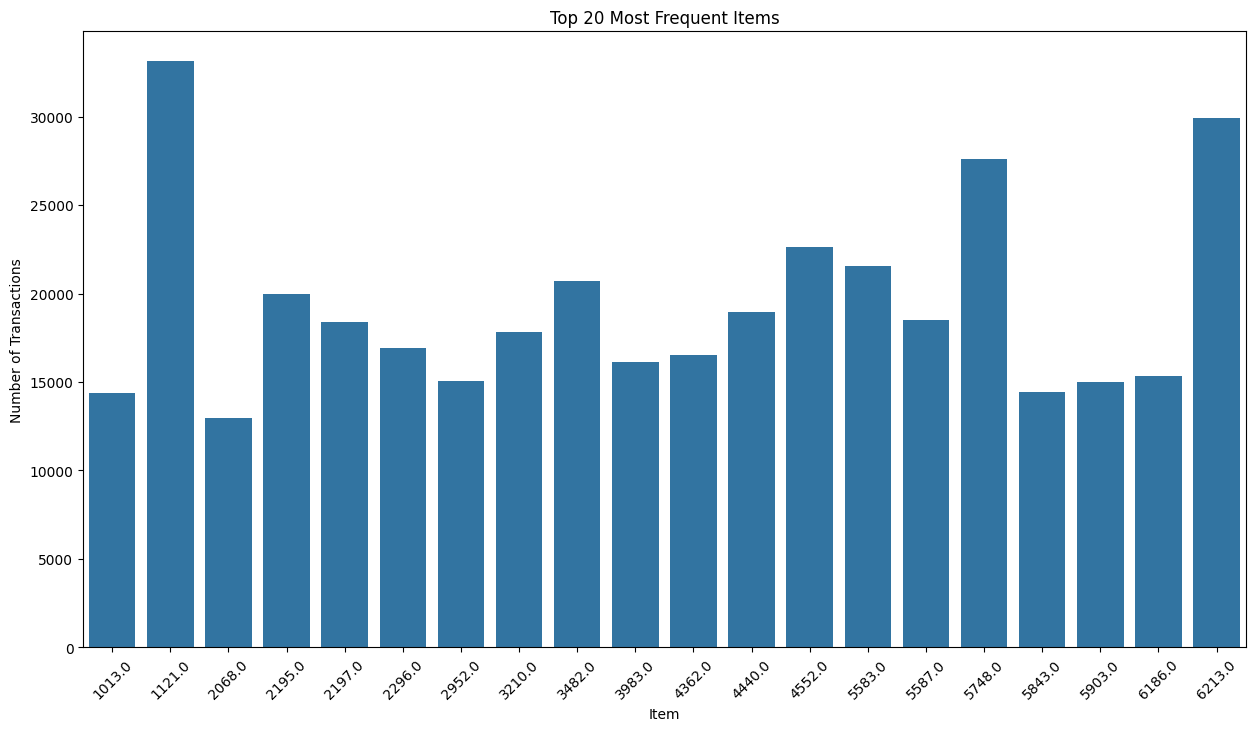

In [ ]:
from collections import Counter

item_counts = Counter(item for transaction in transactions for item in transaction)


import pandas as pd

item_counts_df = pd.DataFrame(item_counts.items(), columns=['Item', 'Count']).sort_values('Count', ascending=False)


import matplotlib.pyplot as plt
import seaborn as sns

top_n = 20
plt.figure(figsize=(15, 8))
sns.barplot(data=item_counts_df.head(top_n), x='Item', y='Count')
plt.title(f'Top {top_n} Most Frequent Items')
plt.xlabel('Item')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


<ipython-input-3-623e9039b6dd>:52: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Confidence')


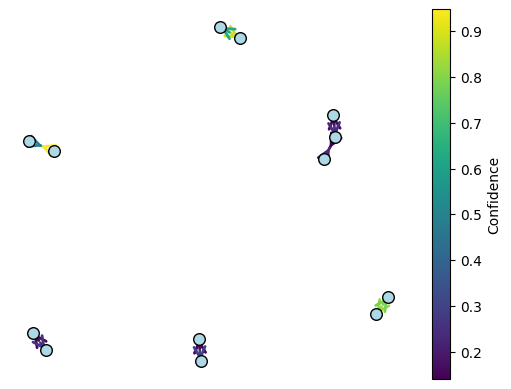

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

rules = [
    {"antecedent": (2733.0,), "consequent": (1632.0,), "conf": 0.140, "supp": 0.001, "lift": 59.074},
    {"antecedent": (1632.0,), "consequent": (2733.0,), "conf": 0.230, "supp": 0.001, "lift": 59.074},
    {"antecedent": (2733.0,), "consequent": (1759.0,), "conf": 0.159, "supp": 0.001, "lift": 62.032},
    {"antecedent": (1759.0,), "consequent": (2733.0,), "conf": 0.242, "supp": 0.001, "lift": 62.032},
    {"antecedent": (5901.0,), "consequent": (1760.0,), "conf": 0.140, "supp": 0.001, "lift": 56.320},
    {"antecedent": (1760.0,), "consequent": (5901.0,), "conf": 0.289, "supp": 0.001, "lift": 56.320},
    {"antecedent": (2200.0,), "consequent": (2192.0,), "conf": 0.154, "supp": 0.001, "lift": 74.370},
    {"antecedent": (2192.0,), "consequent": (2200.0,), "conf": 0.257, "supp": 0.001, "lift": 74.370},
    {"antecedent": (3550.0, 3940.0), "consequent": (2490.0,), "conf": 0.819, "supp": 0.001, "lift": 675.269},
    {"antecedent": (2490.0, 3940.0), "consequent": (3550.0,), "conf": 0.948, "supp": 0.001, "lift": 494.947},
    {"antecedent": (2490.0, 3550.0), "consequent": (3940.0,), "conf": 0.884, "supp": 0.001, "lift": 579.188},
    {"antecedent": (3940.0,), "consequent": (2490.0, 3550.0), "conf": 0.623, "supp": 0.001, "lift": 579.188},
    {"antecedent": (3550.0,), "consequent": (2490.0, 3940.0), "conf": 0.496, "supp": 0.001, "lift": 494.947},
    {"antecedent": (2490.0,), "consequent": (3550.0, 3940.0), "conf": 0.784, "supp": 0.001, "lift": 675.269}
]

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import networkx as nx

G = nx.DiGraph()

for rule in rules:
    lhs = ', '.join(str(item) for item in rule["antecedent"])
    rhs = ', '.join(str(item) for item in rule["consequent"])
    G.add_edge(lhs, rhs, confidence=rule["conf"], support=rule["supp"], lift=rule["lift"])

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=70, node_color='lightblue', edgecolors='black')

confidences = [data['confidence'] for _, _, data in G.edges(data=True)]
norm = mcolors.Normalize(vmin=min(confidences), vmax=max(confidences))
cmap = cm.viridis

for u, v, data in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2,
                           edge_color=[cmap(norm(data['confidence']))],
                           arrowstyle='->', arrowsize=20)

#nx.draw_networkx_labels(G, pos, font_size=10)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Confidence')

plt.axis('off')
plt.show()


Now let's add salespersonID to the basket and see what we can get!

In [ ]:
transactions_with_salesperson = [
    [(str(productID), str(transaction['salesPersonID'])) for productID in transaction['productID']]
    for index, transaction in grouped_data.iterrows()
]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
itemsets1, rules1 = apriori(transactions_with_salesperson, min_support=0.0005, min_confidence=0.001)

for itemset in itemsets1:
    print(itemset)

for rule in rules1:
    print(rule)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1
2
{('5409.0', 'nan')} -> {('5408.0', 'nan')} (conf: 0.634, supp: 0.001, lift: 299.401, conv: 2.729)
{('5408.0', 'nan')} -> {('5409.0', 'nan')} (conf: 0.421, supp: 0.001, lift: 299.401, conv: 1.725)


Let's try to do it without nan's.

In [ ]:
import pandas as pd

transactions_with_salesperson1 = [
    [(str(productID), str(transaction['salesPersonID'])) for productID in transaction['productID']]
    for index, transaction in grouped_data.iterrows()
    if pd.notna(transaction['salesPersonID'])
]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
itemsets2, rules2 = apriori(transactions_with_salesperson1, min_support=0.00005, min_confidence=0.001)

for itemset in itemsets2:
    print(itemset)

for rule in rules2:
    print(rule)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1
2
{('5901.0', '2.0')} -> {('1760.0', '2.0')} (conf: 0.171, supp: 0.000, lift: 1440.004, conv: 1.206)
{('1760.0', '2.0')} -> {('5901.0', '2.0')} (conf: 0.509, supp: 0.000, lift: 1440.004, conv: 2.035)
{('5901.0', '31.0')} -> {('1760.0', '31.0')} (conf: 0.405, supp: 0.000, lift: 4913.803, conv: 1.679)
{('1760.0', '31.0')} -> {('5901.0', '31.0')} (conf: 0.671, supp: 0.000, lift: 4913.803, conv: 3.038)
{('2197.0', '2.0')} -> {('2195.0', '2.0')} (conf: 0.114, supp: 0.000, lift: 223.793, conv: 1.128)
{('2195.0', '2.0')} -> {('2197.0', '2.0')} (conf: 0.115, supp: 0.000, lift: 223.793, conv: 1.129)
{('5998.0', '35.0')} -> {('2988.0', '35.0')} (conf: 0.337, supp: 0.000, lift: 2401.461, conv: 1.507)
{('2988.0', '35.0')} -> {('5998.0', '35.0')} (conf: 0.379, supp: 0.000, lift: 2401.461, conv: 1.611)
{('4201.0', '2.0')} -> {('3367.0', '2.0')} (conf: 0.281, supp: 0.000, lift: 1269.708, conv: 1.390)
{('3367.0', '2.0')} -> {('4201.0', '2.0')} (conf: 0.292, supp: 0.000, lift: 1269.708, conv: 1.413)


Support is incredibly low for all the rules here, but some of them have not-so-terrible confidence. It seems that salesperson with id 2 is quite good at their job, and the one with id 9 is very good (80% success) at selling item 5903 to anyone who bought item 6543.

Now let's analyze sales over time.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


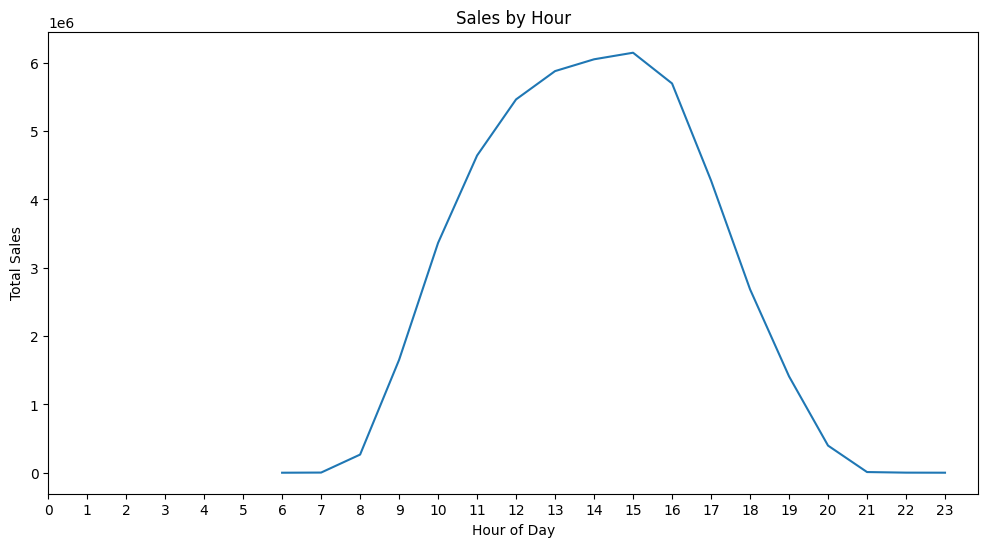

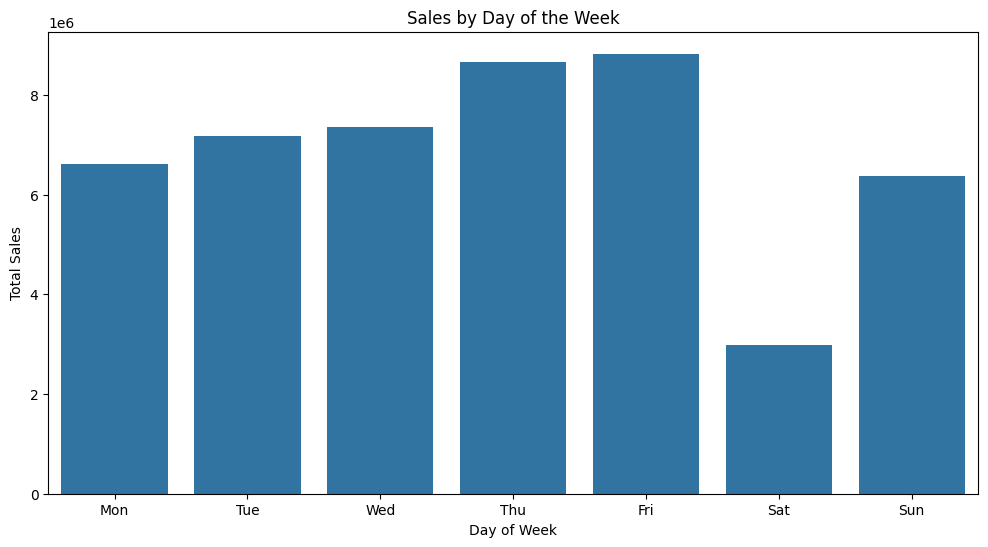

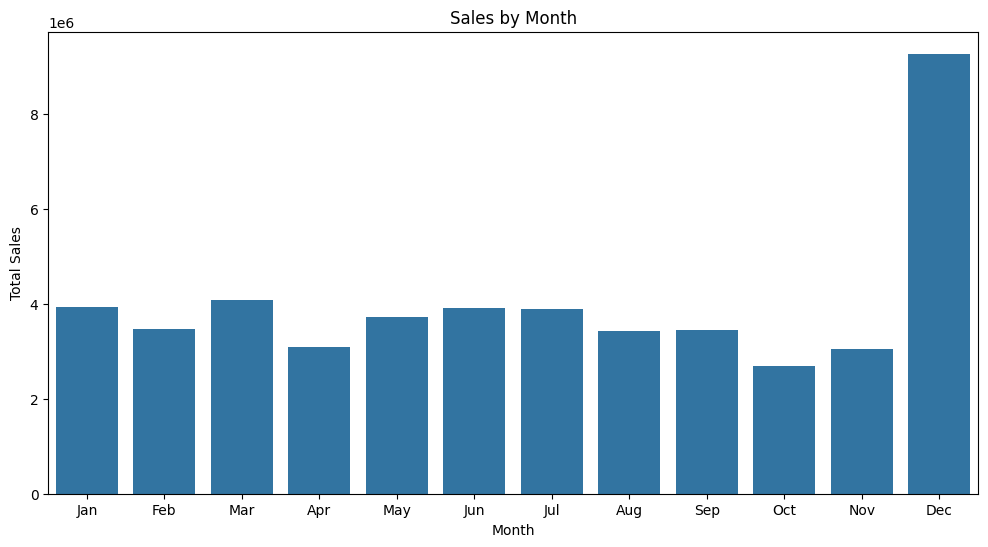

In [ ]:
import pandas as pd

grouped_data['dateTime'] = pd.to_datetime(grouped_data['dateTime'], unit='s')

#print(grouped_data)

grouped_data['hour'] = grouped_data['dateTime'].dt.hour
grouped_data['day_of_week'] = grouped_data['dateTime'].dt.dayofweek
grouped_data['month'] = grouped_data['dateTime'].dt.month

sales_by_hour = grouped_data.groupby('hour')['productValue'].sum()
sales_by_day_of_week = grouped_data.groupby('day_of_week')['productValue'].sum()
sales_by_month = grouped_data.groupby('month')['productValue'].sum()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values)
plt.title('Sales by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_day_of_week.index, y=sales_by_day_of_week.values)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_month.index, y=sales_by_month.values)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()




###################################################################################################

The below part is a record of my futile efforts to find associations using wrong libraries!

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(grouped_data['productID']).transform(grouped_data['productID'])
df = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


It seems that at min_support 0.01 we get only these frequent datasets:     support  itemsets
0  0.013983  (1121.0)
1  0.010988  (5748.0)
2  0.012688  (6213.0)



In [ ]:
frequent_itemsets = apriori(df, min_support=0.003, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.001)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(rules)
print(rules.sort_values('confidence', ascending=False).head())

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(frequent_itemsets)

      support  itemsets
0    0.003278   (944.0)
1    0.006046  (1013.0)
2    0.013983  (1121.0)
3    0.003555  (1124.0)
4    0.003281  (1143.0)
..        ...       ...
97   0.003127  (6830.0)
98   0.003835  (6973.0)
99   0.003609  (8499.0)
100  0.003006  (8500.0)
101  0.003973  (8629.0)

[102 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
